In [1]:


# Otto, tune number of threads
from pandas import read_csv
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from time import time
from matplotlib import pyplot as plt

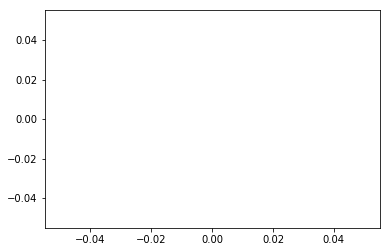

In [2]:
%matplotlib inline
plt.plot()
plt.show()

In [6]:
# load data
data = read_csv('../data/train.csv')
dataset = data.values
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]

In [7]:
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

lgb_train = lgb.Dataset(X, label_encoded_y)


In [14]:
# evaluate the effect of the number of threads
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
    params = {
        'num_leaves': 5,
        'metric': ['l1', 'l2'],
        'verbose': -1,
        'num_threads': n
    }
    start = time()
    lgb.train(params,lgb_train,num_boost_round=5000)
    elapsed = time() - start
    print(n, elapsed)
    results.append(elapsed)

1 40.34008312225342
2 22.414600610733032
3 15.216131210327148
4 14.4872145652771


In [15]:
results

[40.34008312225342, 22.414600610733032, 15.216131210327148, 14.4872145652771]

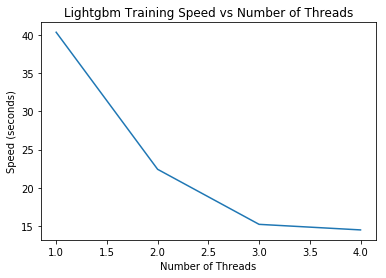

In [16]:
%matplotlib inline
# plot results
plt.plot(num_threads, results)
plt.ylabel('Speed (seconds)')
plt.xlabel('Number of Threads')
plt.title('Lightgbm Training Speed vs Number of Threads')
plt.show()